### Generating random points from a sin function with noise

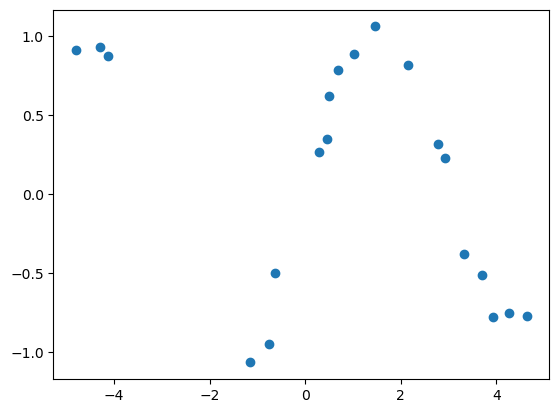

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))
plt.scatter(X,y)

### Fitting the simulated data with the sklearn library's GP

First, we use the sklearn library to see how the curve fits, and the optimal lengthscales and likelihoods.

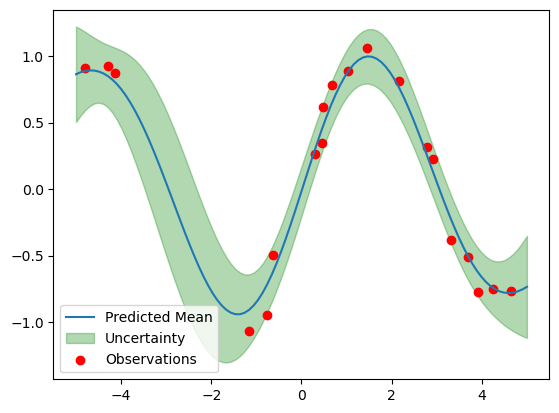

lengthscale RBF(length_scale=1.55)
likelihood: -10.954387616218558


In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define the kernel
kernel = RBF(length_scale=1.0)

# Create the GP regressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.16)

# Fit the GP to the data
gp.fit(X, y)

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
y_mean, y_std = gp.predict(X_test, return_std=True)

# Plot the results
plt.plot(X_test, y_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean - y_std, y_mean + y_std, alpha=0.3, label='Uncertainty',color='green')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print('lengthscale', gp.kernel_)
print('likelihood:',gp.log_marginal_likelihood_value_)


### Fitting the simulated data with the class I created

See how it fits and how it compares to sklearn's. Note that $\sigma_n^2 = \alpha$. Since in the sklearn example I set $\alpha = 0.16$, in order to match that I set $\sigma_n = 0.4$ 

Optimization terminated successfully.
         Current function value: -1.154206
         Iterations: 3
         Function evaluations: 79


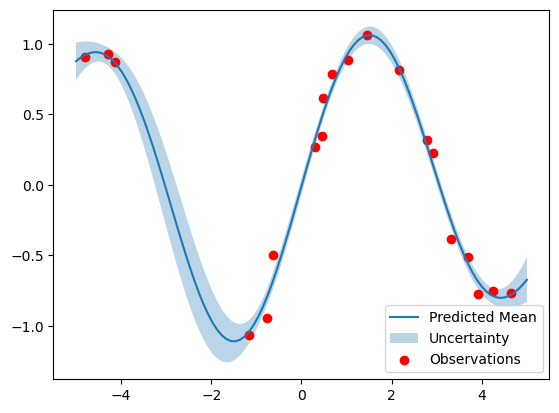

lengthscale, noise [1.67611817 0.10161047]
likelihood: 1.1542059293873876


In [21]:
from GPR import GPR
from GPRCHOL import GPRCHOL

# Create the GP regressor
signal_variance = 1 #1
lengthscale = 1 #0.3
sigma_n = 0.4#0.1
gp = GPR("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n)

# Fit the GP to the data
gp.fit()

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
y_mean, y_std = gp.predict(X_test)

# Plot the results
plt.plot(X_test, y_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean.reshape(-1) - y_std.reshape(-1), y_mean.reshape(-1) + y_std.reshape(-1), alpha=0.3, label='Uncertainty')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print('lengthscale, noise',gp.optimal_params)
print('likelihood:',gp.log_marginal_likelihood())

In [22]:
lmlml = gpw.log_marginal_likelihood()
np.shape(lmlml)

(20,)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from GPR import GPR
from GPRCHOL import GPRCHOL

I = 2
val_a = 1
val_b = 1
val_c = 0.2
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

# Generate some random data
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))

# Define the kernel

# Create the GP regressor

signal_variance = 1 #1
lengthscale = 0.1 #0.3
sigma_n = 0.1 #0.1
gpw = GPRCHOL("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n, [a,b,c])

# Fit the GP to the data
gpw.fit()

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
yw_mean, yw_std = gpw.predict(X_test)

# Plot the results
plt.plot(X_test, yw_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], yw_mean.reshape(-1) - yw_std.reshape(-1), yw_mean.reshape(-1) + yw_std.reshape(-1), alpha=0.3, label='Uncertainty')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print(gpw.optimal_params)
print(gpw.log_marginal_likelihood())

[0.1 0.1 1.  1.  0.2 1.  1.  0.2][69.82417427 70.8115499  71.17269768 68.47120943 61.97807802 72.03359136
 64.2278366  62.84020679 62.86321037 61.38784513 67.86229946 68.05874309
 70.64647933 62.96075082 71.37359375 71.0968501  71.27391087 64.8109024
 68.31581592 64.1458312 ]


ValueError: The user-provided objective function must return a scalar value.

In [ ]:
np.size(yw_mean)

100

[1.  0.1 1.  1.  0.1 1.  1.  0.1]52.10083378725592
[1.00025003 0.1        1.         1.         0.1        1.
 1.         0.1       ]52.09787599637026
[1.         0.08912509 1.         1.         0.1        1.
 1.         0.1       ]52.10506045146017
[1.         0.1        1.00025003 1.         0.1        1.
 1.         0.1       ]52.10324872734663
[1.         0.1        1.         1.00025003 0.1        1.
 1.         0.1       ]52.10411491654676
[1.         0.1        1.         1.         0.08912509 1.
 1.         0.1       ]53.20041322738341
[1.         0.1        1.         1.         0.1        1.00025003
 1.         0.1       ]52.10324872734663
[1.         0.1        1.         1.         0.1        1.
 1.00025003 0.1       ]52.10411491654676
[1.         0.1        1.         1.         0.1        1.
 1.         0.08912509]52.10083378725592
[1.0000625  0.0971628  1.0000625  1.0000625  0.11220185 1.0000625
 1.0000625  0.0971628 ]50.929466582347125
[1.00009375 0.09577452 1.00009375

c:\Users\23478671\Github\Warped-GPs-\GPR.py:196: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  self.res = minimize(obj_func, x0, method='Nelder-Mead',


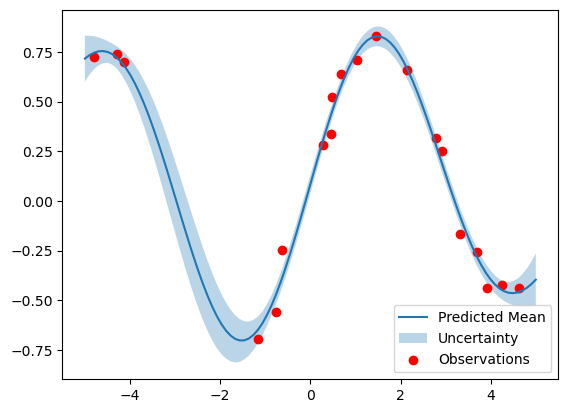

[1.96487499e+00 8.54596405e-02 1.02884069e+03 1.06479000e+00
 1.02884338e+02 6.72226541e-03 1.50737085e-02 0.00000000e+00]
4.421475855844925


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from GPR import GPR
from GPRCHOL import GPRCHOL
I = 2
val_a = 1
val_b = 1
val_c = 0.1
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

# Generate some random data
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))

# Define the kernel

# Create the GP regressor

signal_variance = 1 #1
lengthscale = 1 #0.3
sigma_n = 0.1 #0.1
gpw = GPR("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n, [a,b,c])

# Fit the GP to the data
gpw.fit()

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
[yw_mean, yw_std] = gpw.predict(X_test)


# Plot the results
plt.plot(X_test, yw_mean, label='Predicted Mean')
#plt.fill_between(X_test[:, 0], gpw.inverse_hyp_tan(y_mean.reshape(-1) - 2*yw_std.reshape(-1)), gpw.inverse_hyp_tan(yw_mean.reshape(-1) + 2*yw_std.reshape(-1)), alpha=0.3, label='Uncertainty')
plt.fill_between(X_test[:, 0], yw_mean.reshape(-1) - yw_std.reshape(-1), yw_mean.reshape(-1) + yw_std.reshape(-1), alpha=0.3, label='Uncertainty')


plt.scatter(X[:, 0], gpw.hyp_tan(y), label='Observations', color='red')
plt.legend()
plt.show()
print(gpw.optimal_params)
print(gpw.log_marginal_likelihood())

[1.  0.1 1.  1.  0.1 1.  1.  0.1]52.10083378725592
[1.00025003 0.1        1.         1.         0.1        1.
 1.         0.1       ]52.09787599637026
[1.         0.08912509 1.         1.         0.1        1.
 1.         0.1       ]52.10506045146017
[1.         0.1        1.00025003 1.         0.1        1.
 1.         0.1       ]52.10324872734663
[1.         0.1        1.         1.00025003 0.1        1.
 1.         0.1       ]52.10411491654676
[1.         0.1        1.         1.         0.08912509 1.
 1.         0.1       ]53.20041322738341
[1.         0.1        1.         1.         0.1        1.00025003
 1.         0.1       ]52.10324872734663
[1.         0.1        1.         1.         0.1        1.
 1.00025003 0.1       ]52.10411491654676
[1.         0.1        1.         1.         0.1        1.
 1.         0.08912509]52.10083378725592
[1.0000625  0.0971628  1.0000625  1.0000625  0.11220185 1.0000625
 1.0000625  0.0971628 ]50.929466582347125
[1.00009375 0.09577452 1.00009375

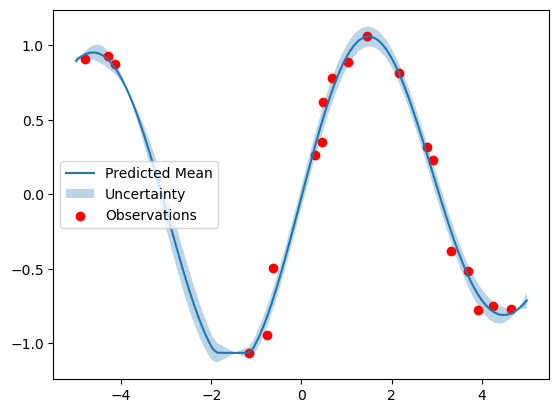

[1.96487499e+00 8.54596405e-02 1.02884069e+03 1.06479000e+00
 1.02884338e+02 6.72226541e-03 1.50737085e-02 0.00000000e+00]
4.421475855844925


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from GPR import GPR
from GPRCHOL import GPRCHOL
I = 2
val_a = 1
val_b = 1
val_c = 0.1
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

# Generate some random data
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))

# Define the kernel

# Create the GP regressor

signal_variance = 1 #1
lengthscale = 1 #0.3
sigma_n = 0.1 #0.1
gpw = GPR("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n, [a,b,c])

# Fit the GP to the data
gpw.fit()

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predicted mean and variance
[yw_mean, yw_std] = gpw.predict_original(X_test)


# Plot the results
plt.plot(X_test, yw_mean, label='Predicted Mean')
#plt.fill_between(X_test[:, 0], gpw.inverse_hyp_tan(y_mean.reshape(-1) - 2*yw_std.reshape(-1)), gpw.inverse_hyp_tan(yw_mean.reshape(-1) + 2*yw_std.reshape(-1)), alpha=0.3, label='Uncertainty')
plt.fill_between(X_test[:, 0], yw_mean.reshape(-1) - yw_std.reshape(-1), yw_mean.reshape(-1) + yw_std.reshape(-1), alpha=0.3, label='Uncertainty')


plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print(gpw.optimal_params)
print(gpw.log_marginal_likelihood())

In [ ]:
gpw.optimal_params

array([1.96487499e+00, 8.54596405e-02, 1.02884069e+03, 1.06479000e+00,
       1.02884338e+02, 6.72226541e-03, 1.50737085e-02, 0.00000000e+00])